In [4]:
import sys
sys.path.insert(0, '..')
import utils.game_utils as gu

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
all_games_df = pd.read_csv('../../data/games/all_games_with_data.csv')

In [6]:
all_games_df.head()


,date,year,week,team,team_score,opponent,opponent_score,win,home,year_week,...,opponent_sack_count,opponent_sack_yards,opponent_fumble_count,opponent_fumble_lost,opponent_penalty_count,opponent_penalty_yards,opponent_third_down_count,opponent_third_down_conversions,opponent_fourth_down_count,opponent_fourth_down_conversions
0,2010-09-09,2010,1,New Orleans Saints,14,Minnesota Vikings,9,1,1,2010-1,...,1,9,1,0,6,60,5,13,0,0
1,2010-09-09,2010,1,Minnesota Vikings,9,New Orleans Saints,14,0,0,2010-1,...,1,8,1,0,3,20,3,11,0,0
2,2010-09-12,2010,1,Chicago Bears,19,Detroit Lions,14,1,1,2010-1,...,2,23,3,2,7,40,4,14,0,1
3,2010-09-12,2010,1,Detroit Lions,14,Chicago Bears,19,0,0,2010-1,...,4,10,4,3,9,100,6,14,0,1
4,2010-09-12,2010,1,Buffalo Bills,10,Miami Dolphins,15,0,1,2010-1,...,3,18,0,0,3,15,8,18,0,0


In [13]:
print(all_games_df['roof'].unique())
print(all_games_df['surface'].unique())

['dome' 'outdoors' 'retractable roof (closed)' 'retractable roof (open)'
 nan]
['sportturf' 'grass' 'astroplay' 'fieldturf' 'matrixturf' 'a_turf'
 'astroturf' nan]


In [21]:
def get_ratio(part=0, whole=0):
    if whole == None or part == None:
        return 0.0
    if whole == '' or part == '':
        return 0.0
    if int(whole) < 1 or int(part) < 1:
        return 0.0
    return part / whole


get_ratio('', 5)

0.0

In [4]:
home_games_df = all_games_df[all_games_df['home'] == True]

In [5]:
perc_home_wins = home_games_df['win'].sum() / len(home_games_df['win']) * 100
perc_home_wins

56.049754994346024

In [6]:
samp_df = home_games_df[home_games_df['home'] == True][['year', 'win']]
samp_df


,year,win
0,2010,1
2,2010,1
4,2010,0
6,2010,1
8,2010,1
...,...,...
5296,2020,0
5298,2020,0
5300,2020,0
5302,2020,1


In [7]:
win_perc_year_df = samp_df.groupby('year').sum() / samp_df.groupby('year').count() * 100
win_perc_year_df

,win
year,
2010,56.962025
2011,57.201646
2012,57.692308
2013,59.583333
2014,57.142857
2015,53.191489
2016,58.436214
2017,55.785124
2018,59.336100


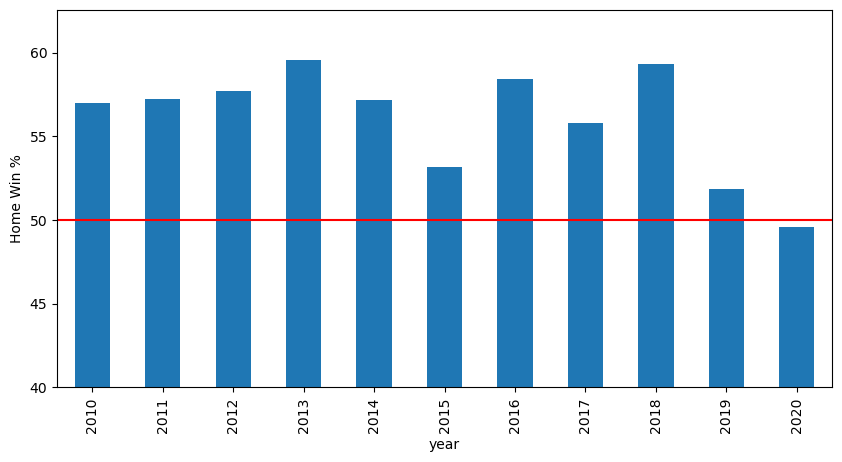

In [8]:
fig, ax = plt.subplots(figsize=(10,5),dpi=100)
win_perc_year_df.plot(kind='bar', legend=None, ax=ax)
plt.axhline(y=50, color='r', linestyle='-')
plt.ylim(bottom=40)
plt.ylabel('Home Win %');

In [90]:
saints_games_df = dual_games_df[dual_games_df['team'] == gu.TEAM_NAME['Saints']]

In [91]:
saints_games_df.head()

,date,year,week,team,team_score,opponent,opponent_score,win,home,temperature,...,opponent_fumble_lost,opponent_penalty_count,opponent_penalty_yards,opponent_third_down_count,opponent_third_down_conversions,opponent_fourth_down_count,opponent_fourth_down_conversions,year_week,team_win,opponent_win
0,2010-09-09,2010,1,New Orleans Saints,14,Minnesota Vikings,9,1,1,NaN,...,0,6,60,5,13,0,0,2010-1,1,0
59,2010-09-20,2010,2,New Orleans Saints,25,San Francisco 49ers,22,1,0,65.0,...,2,5,40,5,9,0,0,2010-2,1,0
104,2010-10-03,2010,4,New Orleans Saints,16,Carolina Panthers,14,1,1,NaN,...,1,4,66,4,12,1,2,2010-4,1,0
135,2010-10-10,2010,5,New Orleans Saints,20,Arizona Cardinals,30,0,0,NaN,...,0,3,20,4,15,1,1,2010-5,0,1
149,2010-10-17,2010,6,New Orleans Saints,31,Tampa Bay Buccaneers,6,1,0,81.0,...,1,5,30,6,15,2,3,2010-6,1,0


In [23]:
saints_games_df['year'].map(str) + '-' + saints_games_df['week'].map(str)

0        2010-1
59       2010-2
104      2010-4
135      2010-5
149      2010-6
         ...   
5155    2020-13
5205    2020-14
5236    2020-15
5242    2020-16
5291    2020-17
Length: 163, dtype: object

In [13]:
saints_games_df['team_pass_yards']

0       237
59      254
104     275
135     279
149     263
       ... 
5155    232
5205    291
5236    234
5242    319
5291    201
Name: team_pass_yards, Length: 163, dtype: int64

In [16]:
saints_games_df['team_pass_yards'].mean()

296.2453987730061

In [39]:
saints_games_df['team_pass_yards'].describe()

count    163.000000
mean     296.245399
std       72.410276
min       78.000000
25%      246.000000
50%      299.000000
75%      347.500000
max      505.000000
Name: team_pass_yards, dtype: float64

In [40]:
saints_games_df['team_pass_yards'].describe().loc['25%']

246.0

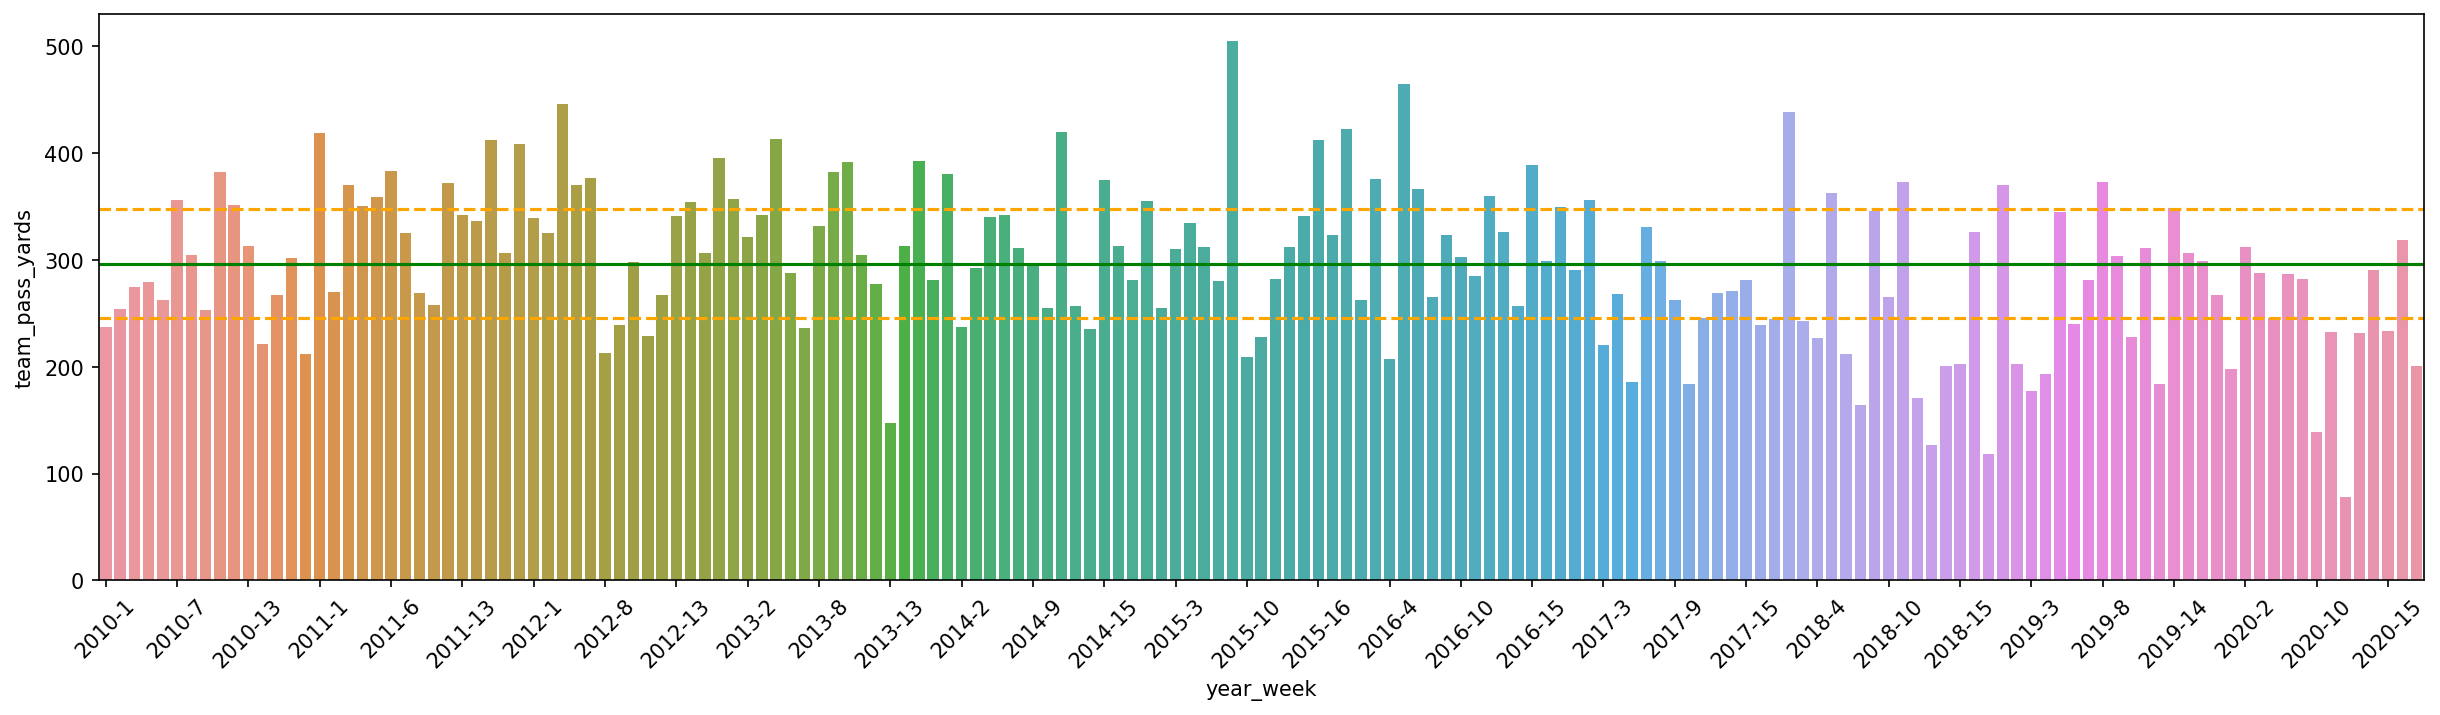

In [45]:
import matplotlib.ticker as plticker

fig, ax = plt.subplots(figsize=(20, 5), dpi=150)
# plt.figure(figsize=(20,5),dpi=150)
# sns.lineplot(data=saints_games_df, x='year_week',y='team_pass_yards', ax=ax)
mean = saints_games_df['team_pass_yards'].describe().loc['mean']
q25 = saints_games_df['team_pass_yards'].describe().loc['25%']
q75 = saints_games_df['team_pass_yards'].describe().loc['75%']
sns.barplot(data=saints_games_df, x='year_week',y='team_pass_yards', ax=ax)
plt.xticks(rotation=45);
plt.axhline(y=q25, color='orange', linestyle='--')
plt.axhline(y=mean, color='g', linestyle='-')
plt.axhline(y=q75, color='orange', linestyle='--')
loc = plticker.MultipleLocator(
    base=5.0)  # this locator puts ticks at regular intervals
ax.xaxis.set_major_locator(loc)

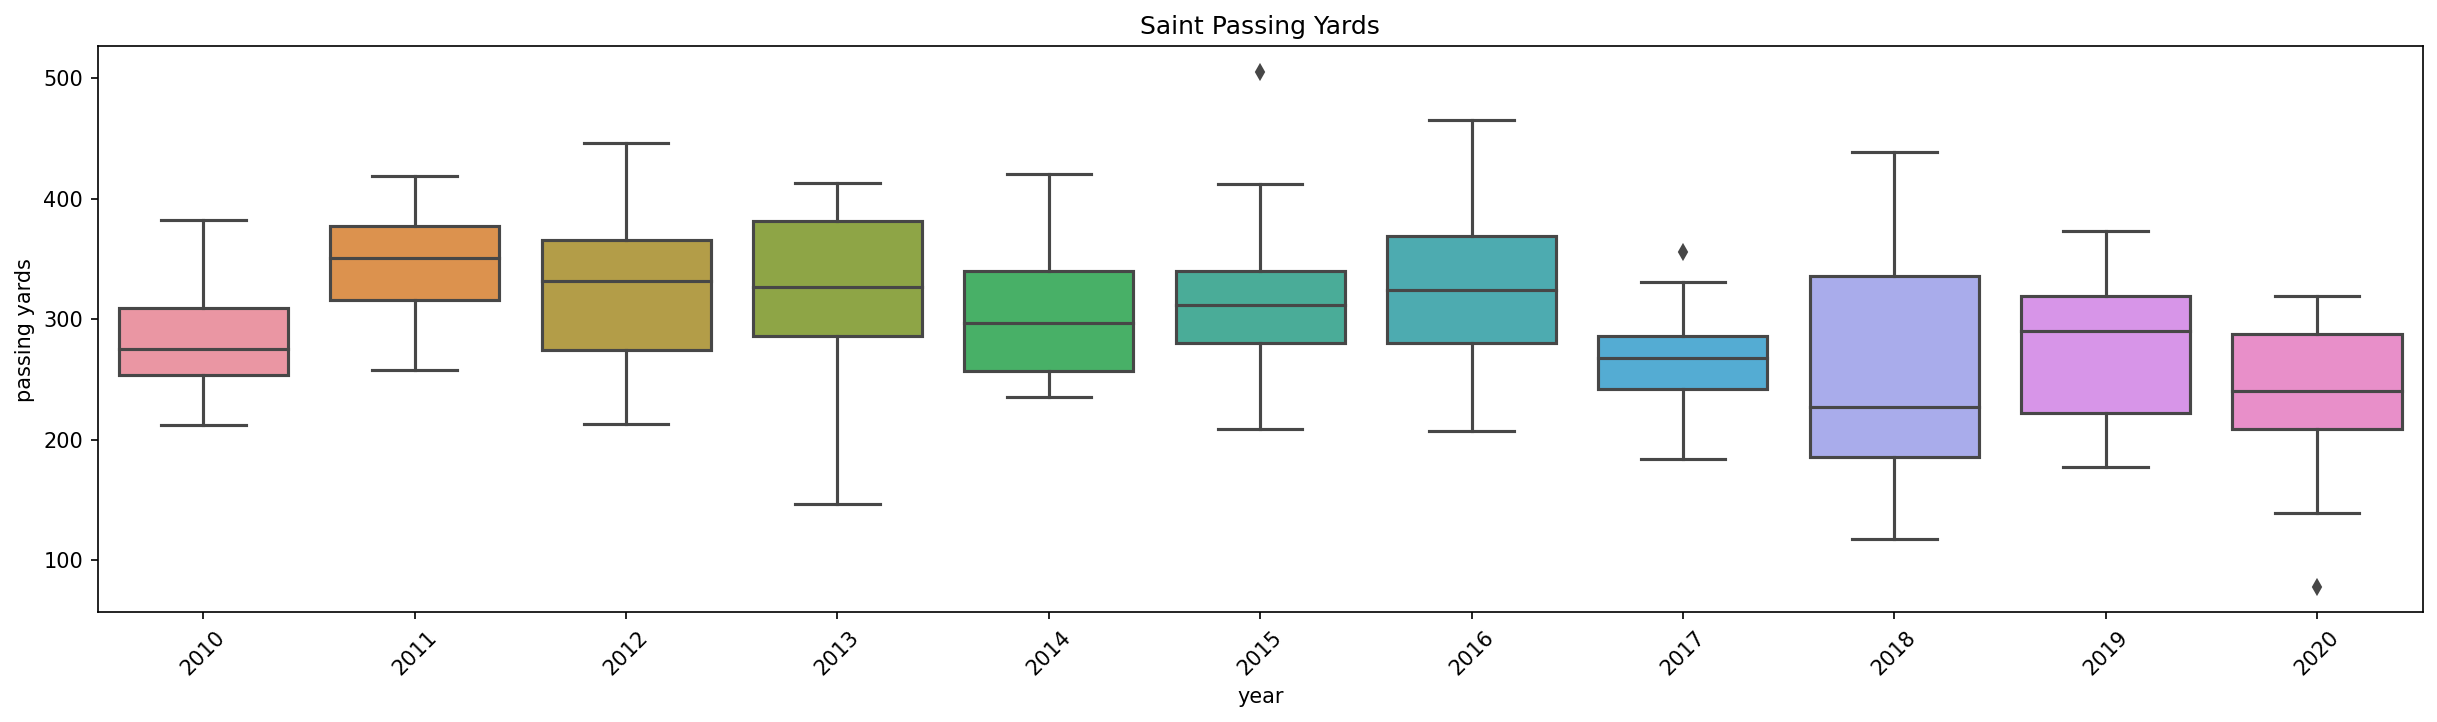

In [77]:
import matplotlib.ticker as plticker


def do_plot(data,
            x='year',
            y='team_pass_yards',
            tick_every=1.0,
            xlabel=None,
            ylabel=None, title=None):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=150)
    # sns.violinplot(data=data, y=y, x=x)
    sns.boxplot(data=data, y=y, x=x)
    # sns.barplot(data=data, y=y, x=x)
    plt.xticks(rotation=45)
    loc = plticker.MultipleLocator(
        base=tick_every)  # this locator puts ticks at regular intervals
    ax.xaxis.set_major_locator(loc)

    if xlabel != None:
      ax.set_xlabel(xlabel)
    if ylabel != None:
      ax.set_ylabel(ylabel)
    if ylabel != None:
      ax.set_title(title)
      
      
do_plot(data=saints_games_df, ylabel='passing yards', title='Saint Passing Yards')


In [92]:
saints_games_df['win']

0       1
59      1
104     1
135     0
149     1
       ..
5155    1
5205    0
5236    0
5242    1
5291    1
Name: win, Length: 163, dtype: int64

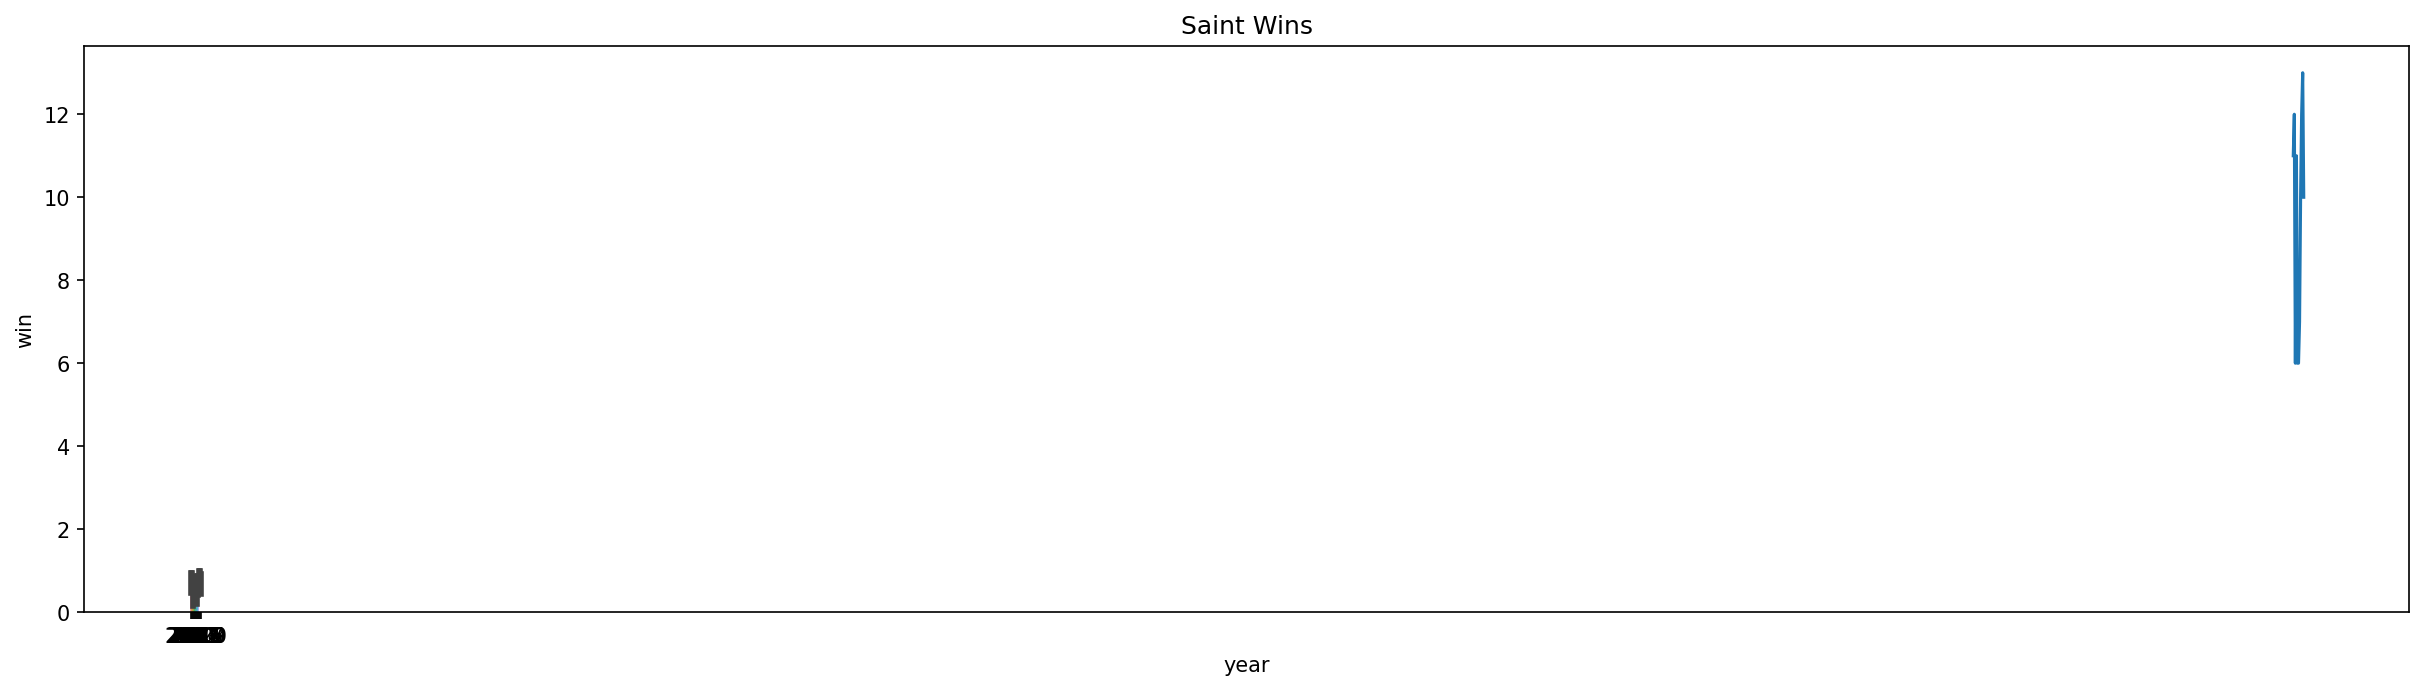

In [102]:
def do_plot(data,
            x='year',
            y='win',
            tick_every=1.0,
            xlabel=None,
            ylabel=None,
            title=None):


    fig, ax1 = plt.subplots(figsize=(20, 5), dpi=150)
    if xlabel != None:
        ax1.set_xlabel(xlabel)
    if ylabel != None:
        ax1.set_ylabel(ylabel)
    if ylabel != None:
        ax1.set_title(title)


    # passing yards
    sns.barplot(data=data, y=y, x=x, ax=ax1)
    plt.xticks(rotation=45)
    # loc = plticker.MultipleLocator(base=tick_every)  # this locator puts ticks at regular intervals
    # ax1.xaxis.set_major_locator(loc)

    data.groupby('year').sum()['win'].plot()
    
    # passing yards
    # ax2 = ax1.twinx()
    # sns.barplot(data=data, y='team_win', x=x, ax=ax2)
    # plt.xticks(rotation=45)
    # loc = plticker.MultipleLocator(
    #     base=tick_every)  # this locator puts ticks at regular intervals
    # ax2.xaxis.set_major_locator(loc)




do_plot(data=saints_games_df,
        ylabel='wins',
        title='Saint Wins')


<AxesSubplot:xlabel='year'>

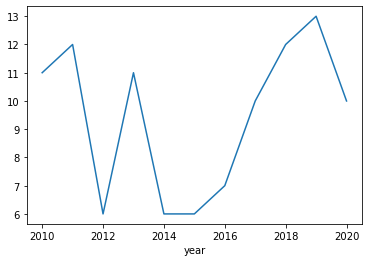

In [100]:
saints_games_df.groupby('year').sum()['win'].plot()

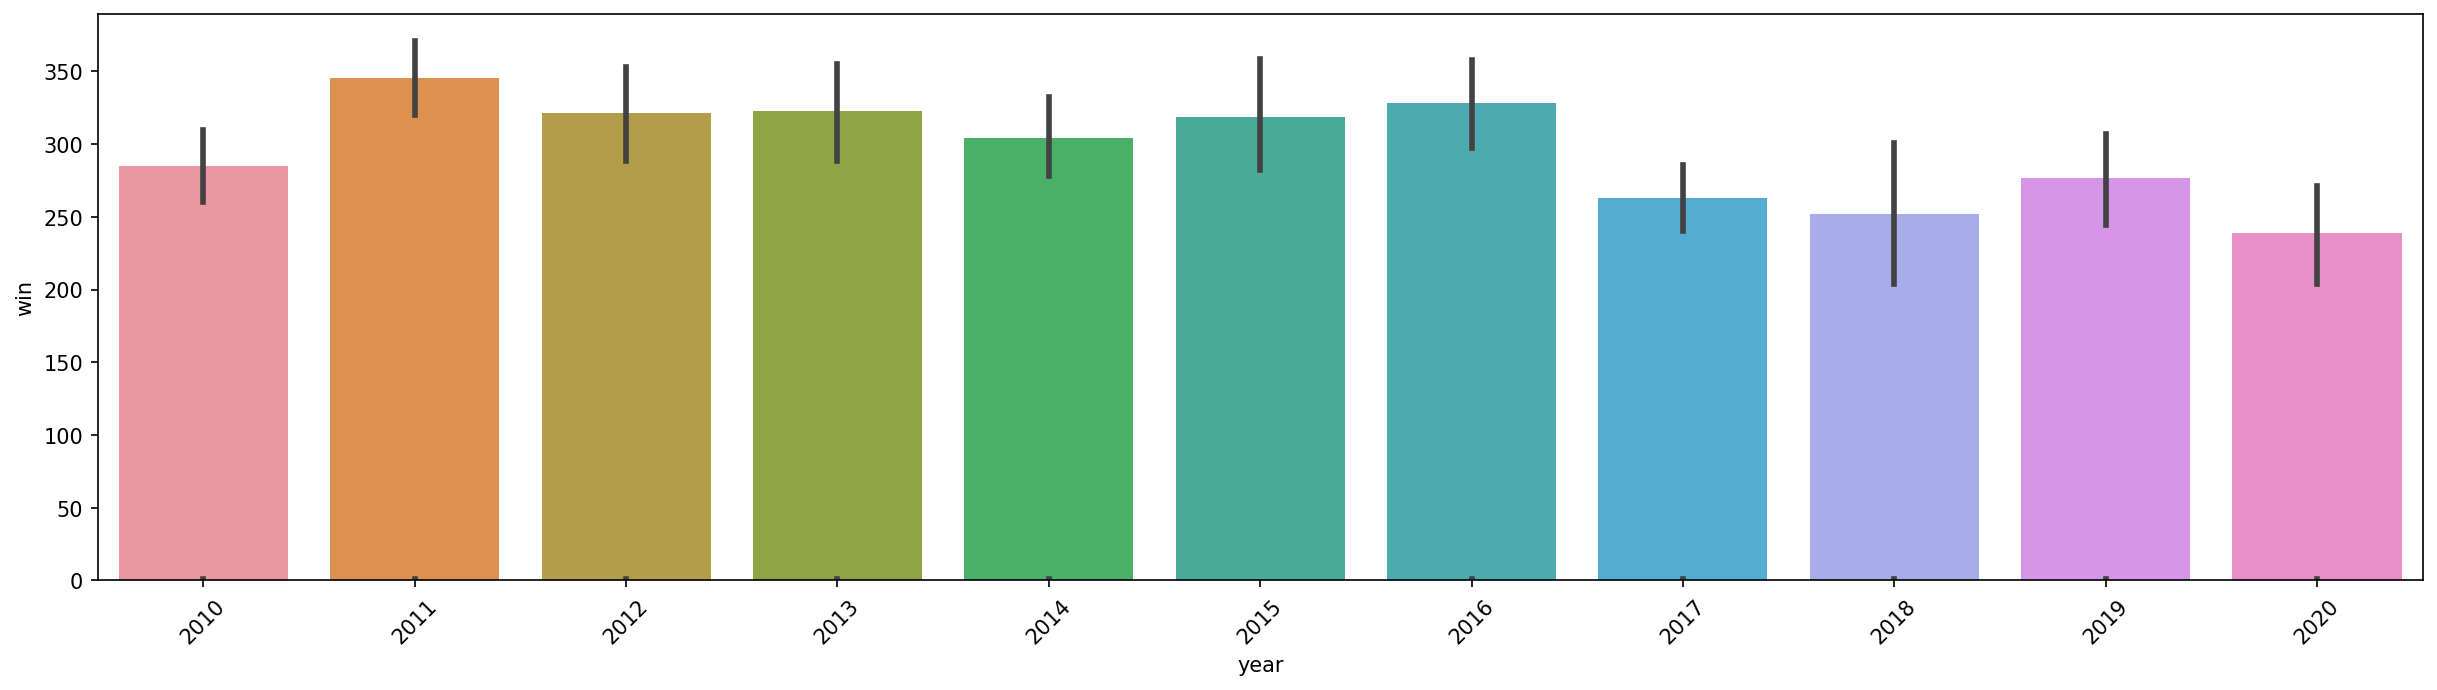

In [116]:
plt.figure(figsize=(20, 5), dpi=150)
sns.barplot(data=saints_games_df, y='team_pass_yards', x='year')
sns.barplot(data=saints_games_df, y='win', x='year')
# saints_games_df.groupby('year').sum()['win'].plot(secondary_y=True)
plt.xticks(rotation=45);


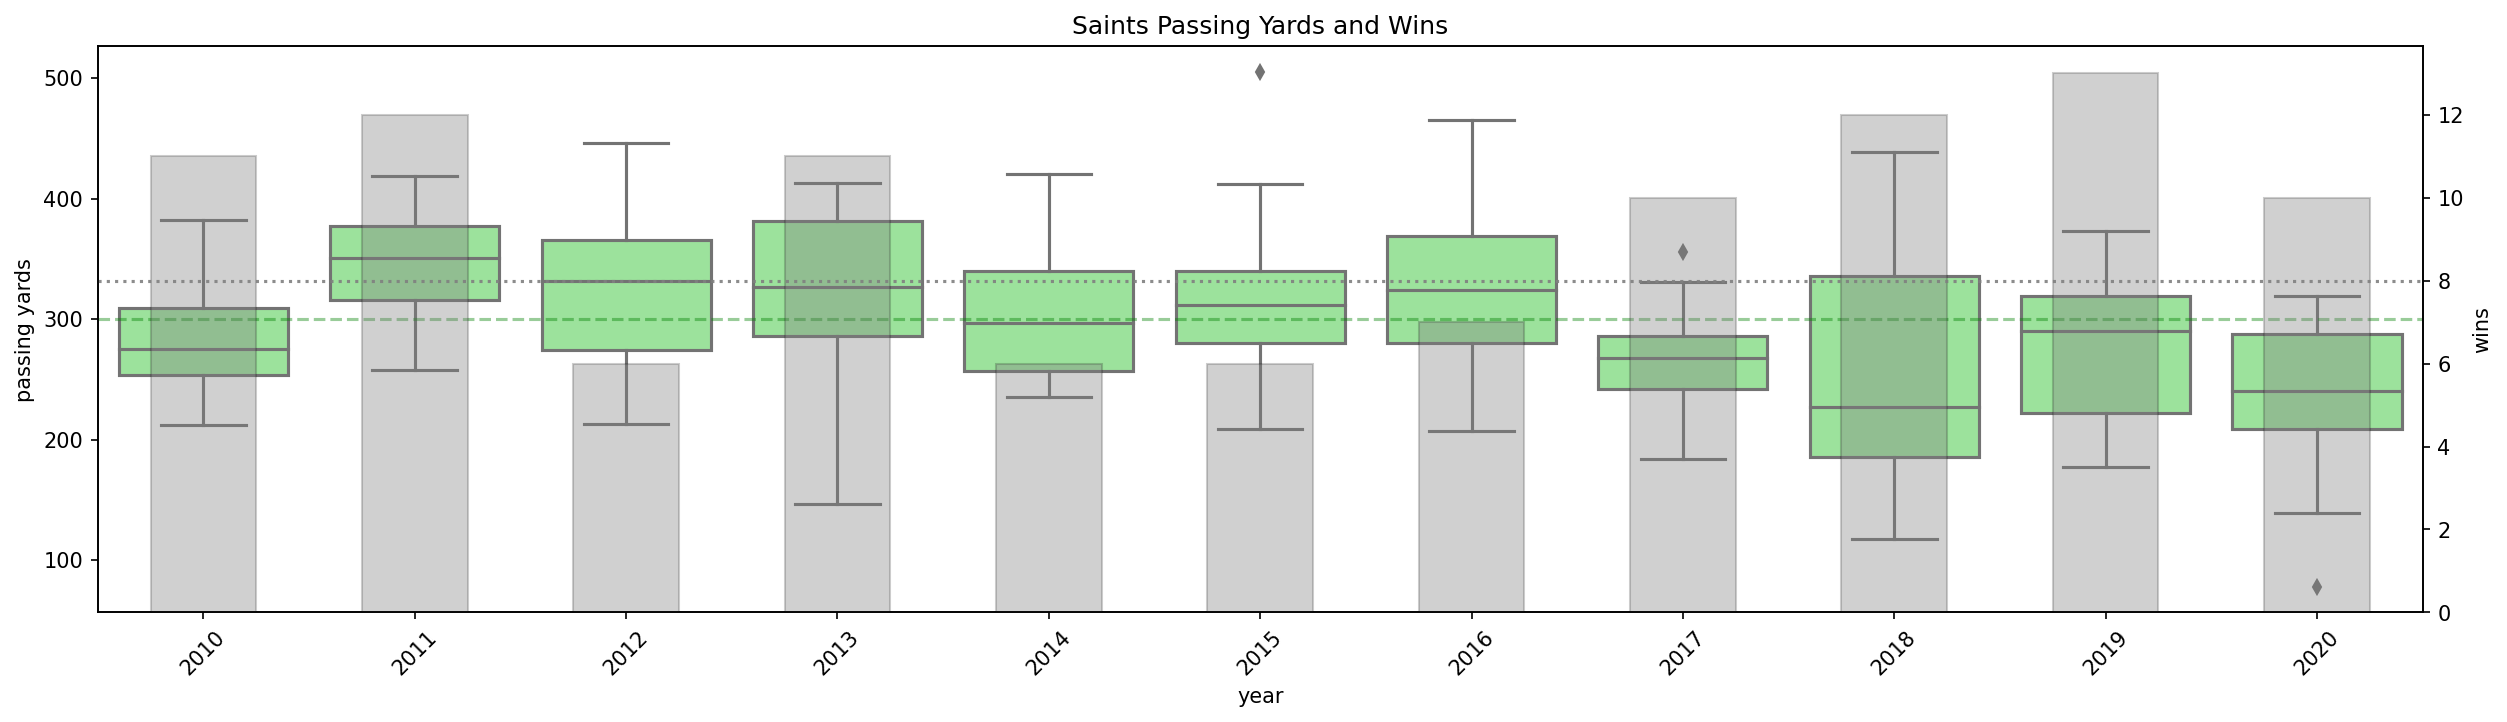

In [165]:
import matplotlib.patheffects as path_effects

data = saints_games_df


fig, ax1 = plt.subplots(figsize=(20, 5), dpi=150)

# passing yards
# sns.barplot(data=data, x='year', y='team_pass_yards', ax=ax1)
sns.boxplot(data=data, x='year', y='team_pass_yards', ax=ax1, color='lightgreen')
plt.xticks(rotation=45)
# loc = plticker.MultipleLocator(base=tick_every)  # this locator puts ticks at regular intervals
# ax1.xaxis.set_major_locator(loc)
plt.axhline(y=300, color='green', linestyle='dashed', alpha=0.4)

ax2 = ax1.twinx()

# data.groupby('year').sum()['win'].plot(kind='bar', ax=ax2, alpha=0.3, color='green')
data.groupby('year').sum()['win'].plot(
    kind='bar',
    ax=ax2,
    alpha=0.2,
    color='gray',
    path_effects=[
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
    ])

plt.axhline(y=8, color='gray', linestyle='dotted', alpha=0.9)
ax1.set_ylabel("passing yards")
ax2.set_ylabel("wins")
ax1.set_title("Saints Passing Yards and Wins");

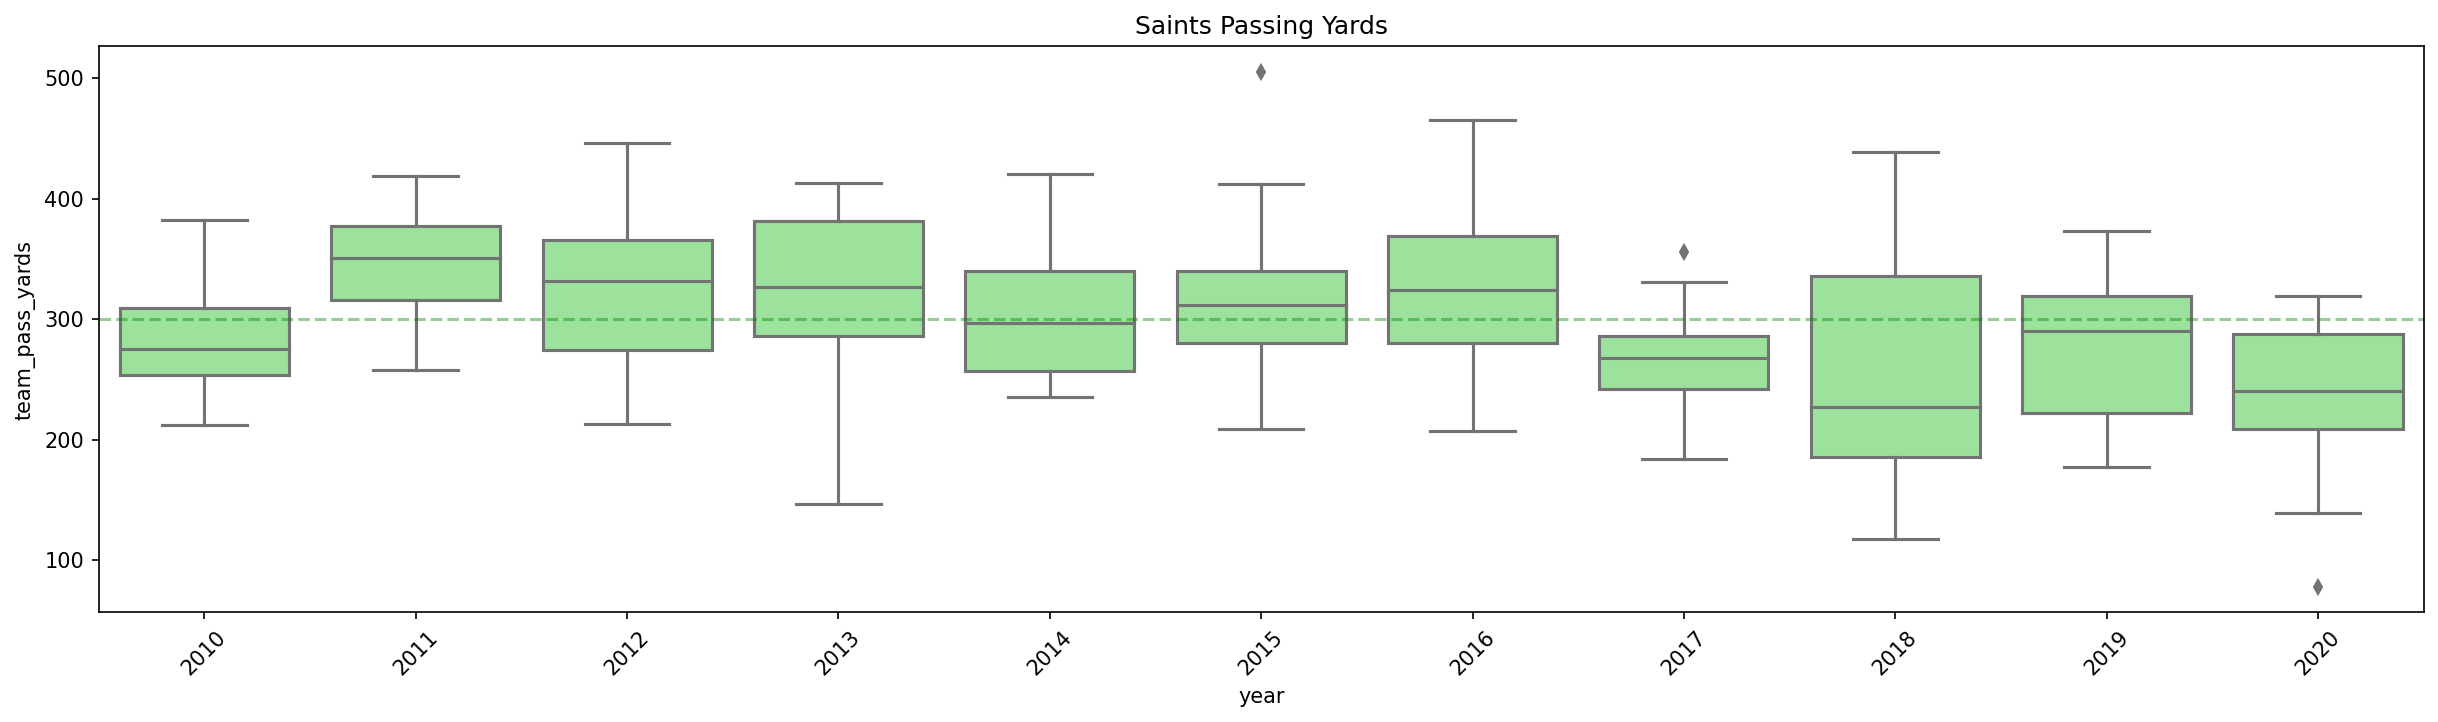

In [160]:
data = saints_games_df

fig, ax1 = plt.subplots(figsize=(20, 5), dpi=150)

# passing yards
# sns.barplot(data=data, x='year', y='team_pass_yards', ax=ax1)
sns.boxplot(data=data,
            x='year',
            y='team_pass_yards',
            ax=ax1,
            color='lightgreen')
plt.xticks(rotation=45)
# loc = plticker.MultipleLocator(base=tick_every)  # this locator puts ticks at regular intervals
# ax1.xaxis.set_major_locator(loc)
plt.axhline(y=300, color='green', linestyle='dashed', alpha=0.4)

ax1.set_title("Saints Passing Yards");


Text(0.5, 1.0, 'Saints Wins')

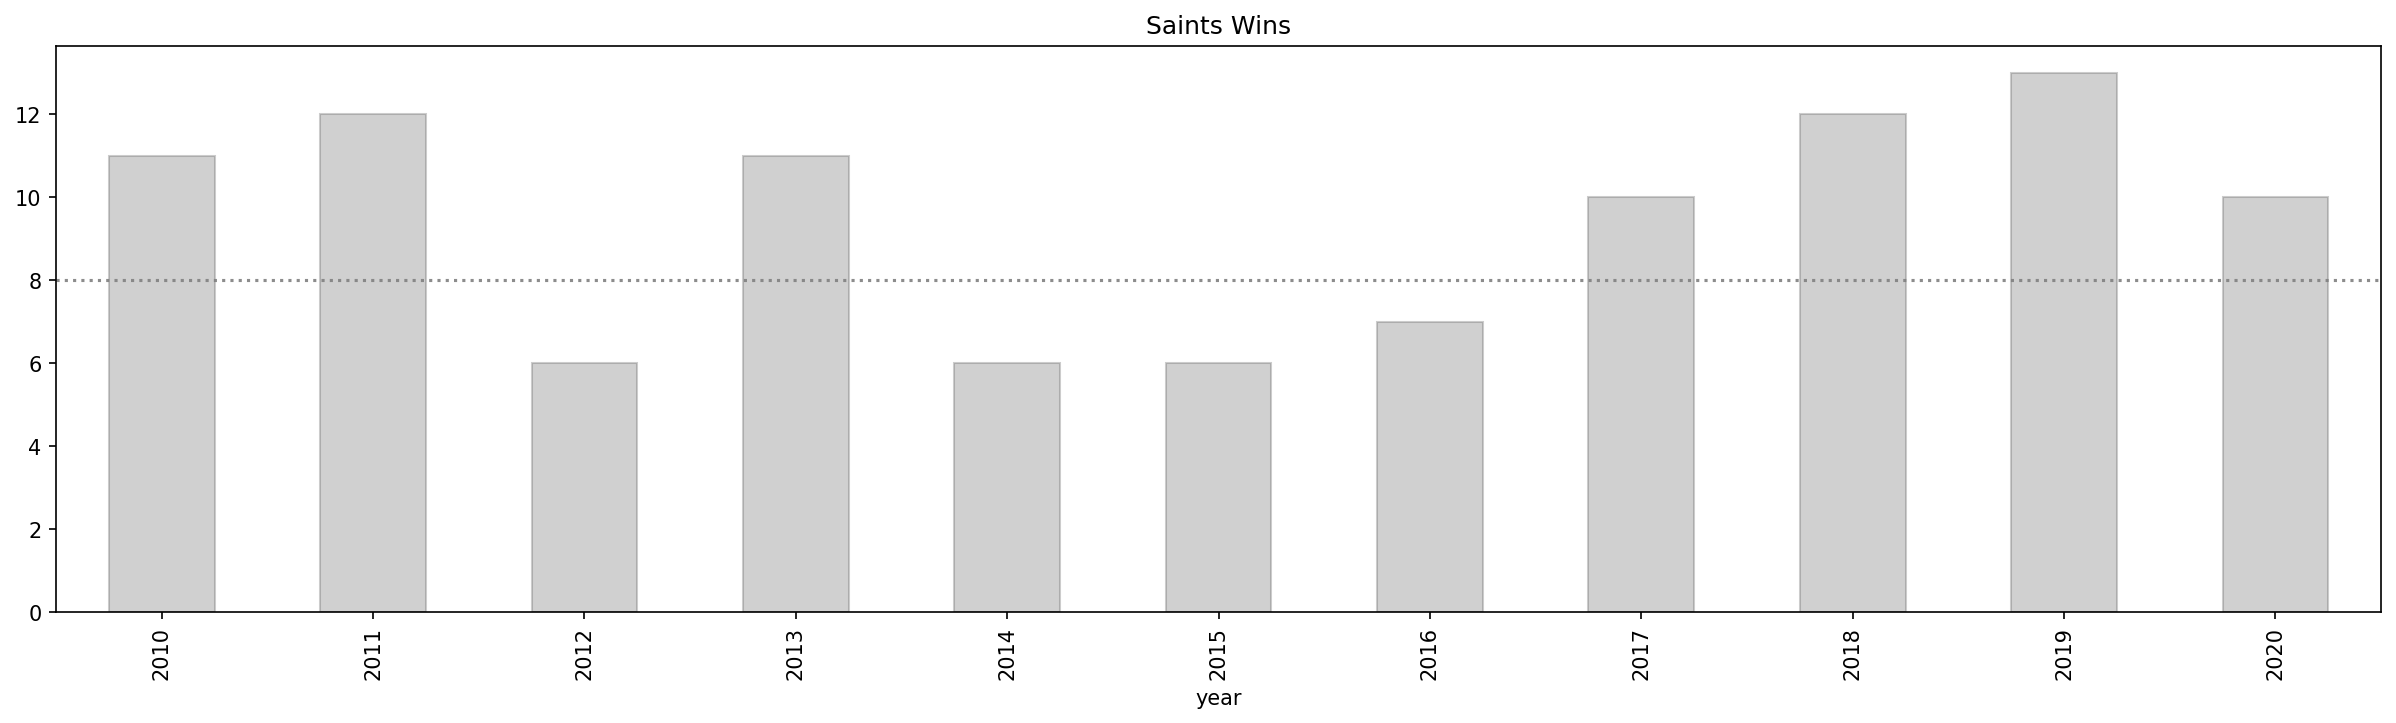

In [162]:
data = saints_games_df

fig, ax1 = plt.subplots(figsize=(20, 5), dpi=150)
# data.groupby('year').sum()['win'].plot(kind='bar', ax=ax2, alpha=0.3, color='green')
data.groupby('year').sum()['win'].plot(
    kind='bar',
    alpha=0.2,
    color='gray',
    path_effects=[
        path_effects.Stroke(linewidth=1, foreground='black'),
        path_effects.Normal()
    ])

plt.axhline(y=8, color='gray', linestyle='dotted', alpha=0.9)
ax1.set_title("Saints Wins")


In [176]:
import matplotlib.patheffects as path_effects

def plot_team_yearly(data, y, title):
    fig, ax1 = plt.subplots(figsize=(20, 5), dpi=150)

    # passing yards
    # sns.barplot(data=data, x='year', y=y, ax=ax1)
    sns.boxplot(data=data,
                x='year',
                y=y,
                ax=ax1,
                color='lightgreen')
    plt.xticks(rotation=45)
    # loc = plticker.MultipleLocator(base=tick_every)  # this locator puts ticks at regular intervals
    # ax1.xaxis.set_major_locator(loc)
    
    plt.axhline(y=data[y].mean(), color='green', linestyle='dashed', alpha=0.4)

    ax2 = ax1.twinx()

    # data.groupby('year').sum()['win'].plot(kind='bar', ax=ax2, alpha=0.3, color='green')
    data.groupby('year').sum()['win'].plot(
        kind='bar',
        ax=ax2,
        alpha=0.2,
        color='gray',
        path_effects=[
            path_effects.Stroke(linewidth=1, foreground='black'),
            path_effects.Normal()
        ])

    # 8 wins line
    plt.axhline(y=8, color='gray', linestyle='dotted', alpha=0.9)
    ax1.set_ylabel(y)
    ax2.set_ylabel("wins")
    
    if title ~= None:
      ax1.set_title(title)



SyntaxError: invalid syntax (<ipython-input-176-96160e30606c>, line 37)

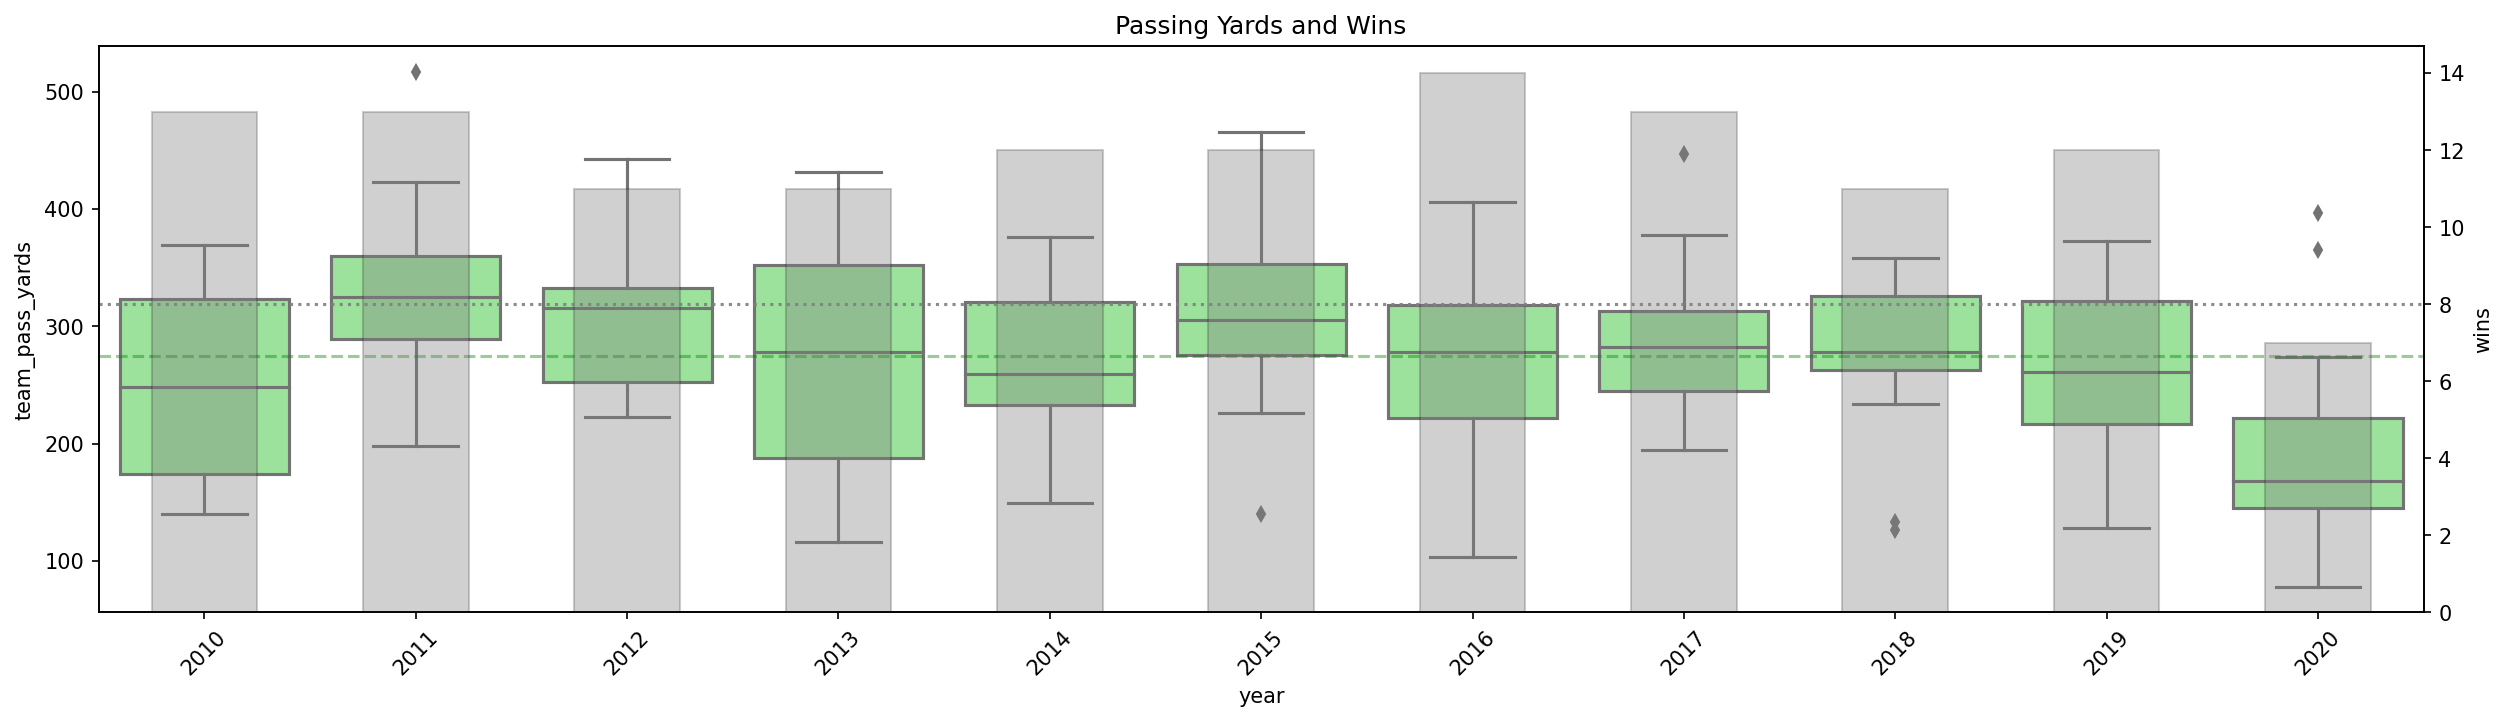

In [177]:
plot_team_yearly(
    data=dual_games_df[dual_games_df['team'] == gu.TEAM_NAME['Patriots']],
    y='team_pass_yards',
    title="Passing Yards and Wins")


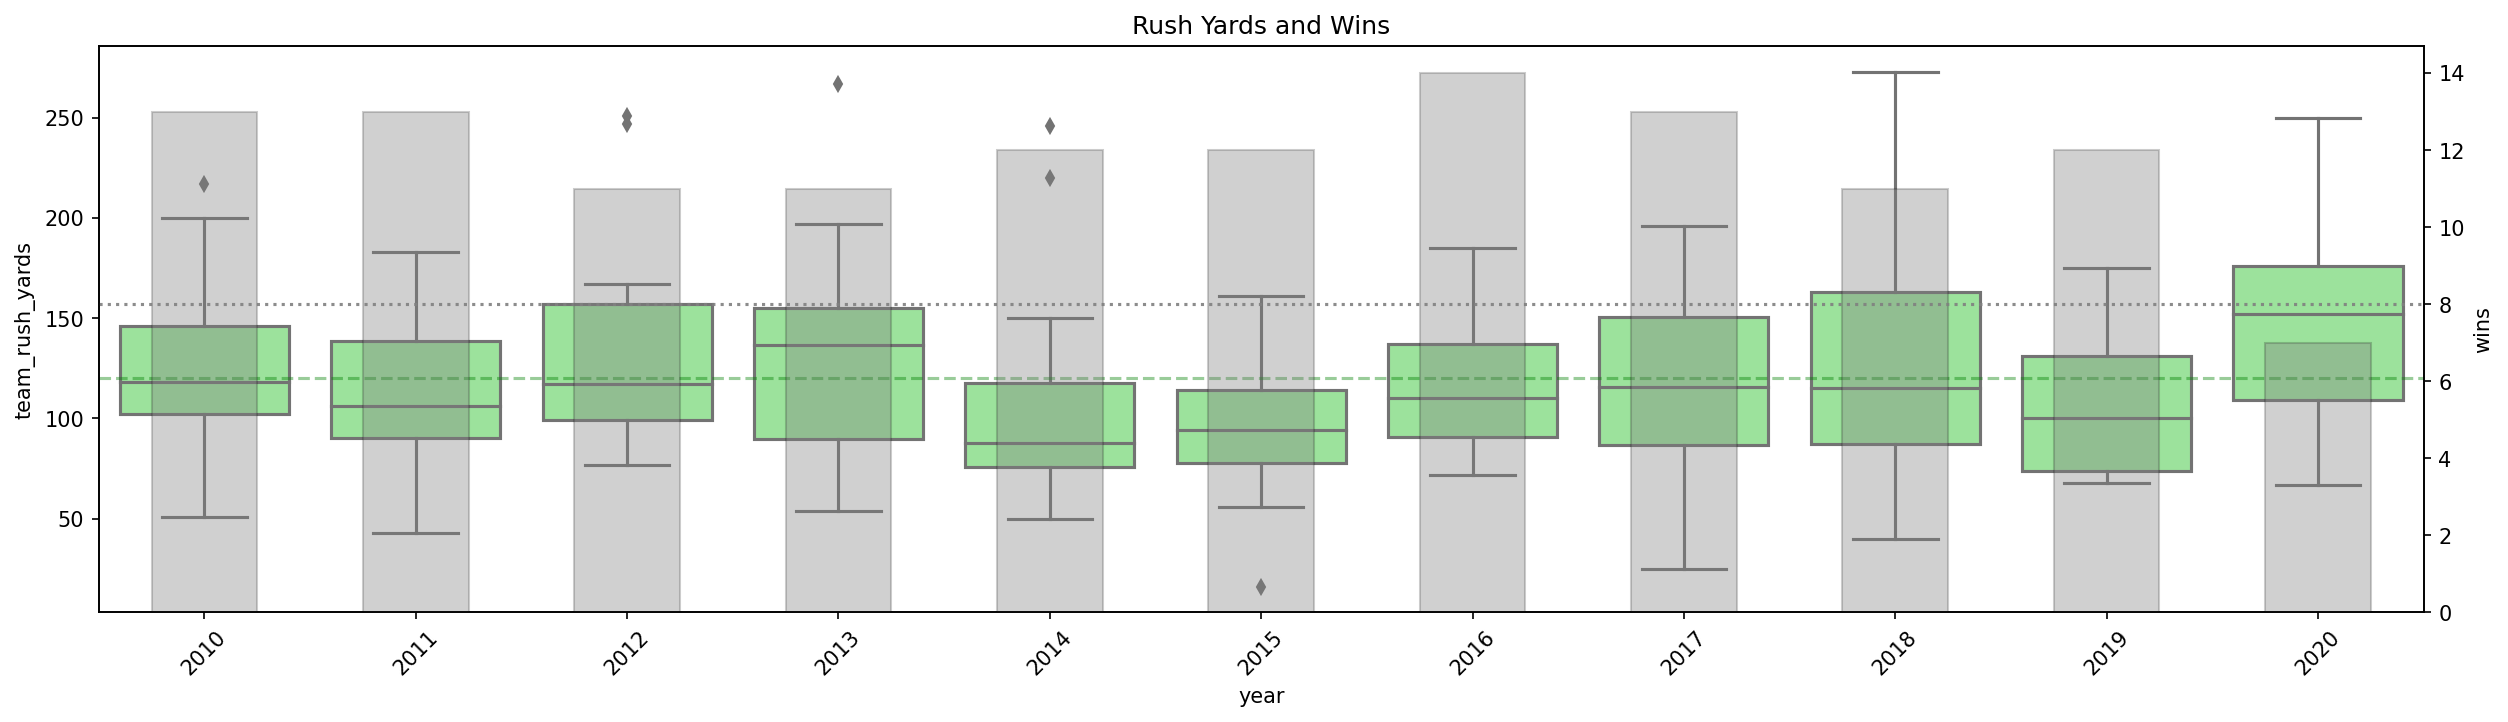

In [178]:
plot_team_yearly(
    data=dual_games_df[dual_games_df['team'] == gu.TEAM_NAME['Patriots']],
    y='team_rush_yards',
    title="Rush Yards and Wins")


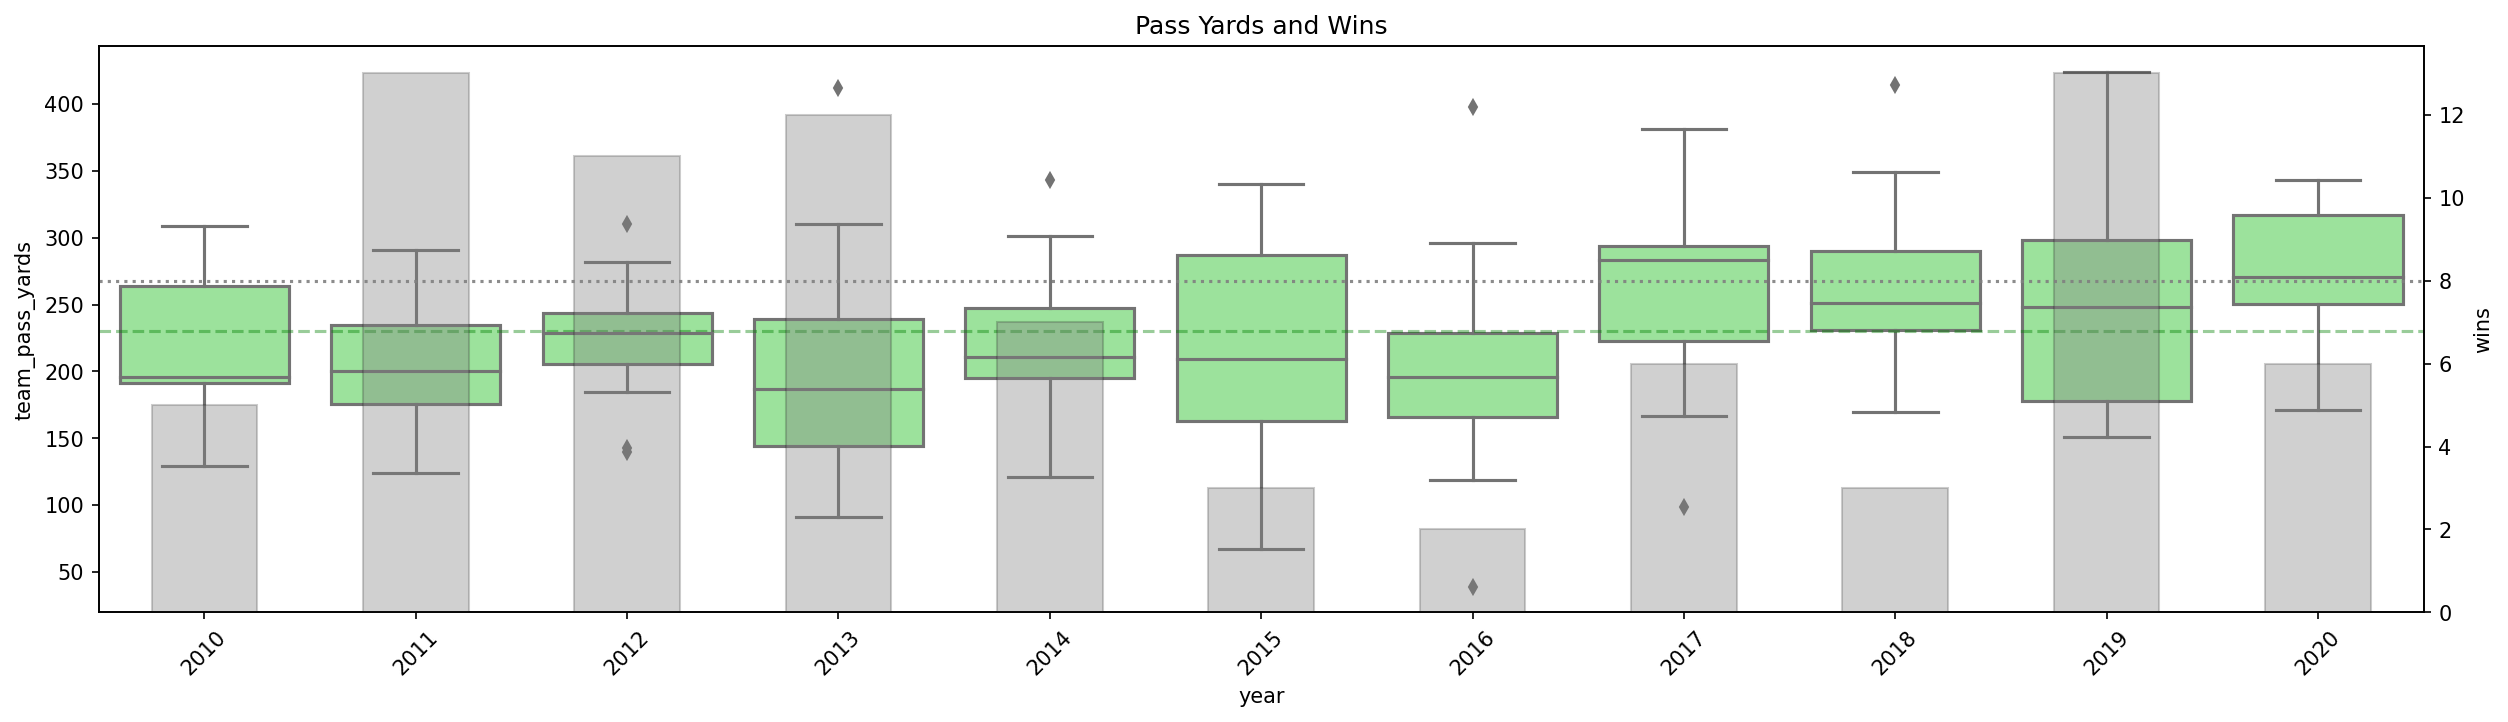

In [180]:
plot_team_yearly(
    data=dual_games_df[dual_games_df['team'] == gu.TEAM_NAME['49ers']],
    y='team_pass_yards',
    title="Pass Yards and Wins")
